<a href="https://colab.research.google.com/github/frankssenoga/frankssenoga/blob/main/Evidence_Detection_in_cloud_forensics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install lime

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
import lime
import lime.lime_tabular
from lime import lime_tabular
from sklearn.neural_network import MLPClassifier

## **LOADING THE DATASET**

In [5]:
dataset=pd.read_csv('/content/drive/MyDrive/ML DATASETS/VMResourceUtilizationSlope.csv')
dataset


,LAST_POLL,VMID,UUID,dom,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,...,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
0,1604455173,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,88.2065,30.1414,0.0,0.0,79.8981,5.5275,...,0.0,24.3045,89.9850,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,1604455142,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8708,27.3499,0.0,0.0,0.0000,0.0000,...,0.0,5.9061,89.8986,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,1604455113,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8865,27.2996,0.0,0.0,0.0000,0.0000,...,0.0,32.8285,89.9897,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,1604455082,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8760,27.4076,0.0,0.0,0.0000,0.0000,...,0.0,4.2364,89.8741,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,1604455055,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.7241,25.8210,0.0,0.0,0.0000,0.0000,...,0.0,22.7510,89.9864,0.0,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9605,1604601182,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,88.7897,30.9638,0.0,0.0,90.0000,89.9974,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,Attack
9606,1604601152,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,88.0519,29.5388,0.0,0.0,90.0000,89.9977,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,Attack
9607,1604601122,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,89.1474,45.9392,0.0,0.0,90.0000,89.9950,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,Attack
9608,1604601092,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,87.7974,26.5651,0.0,0.0,0.0000,0.0000,...,0.0,20.1363,89.9650,0.0,0.0,0.0,0.0,0.0,0.0,Attack


In [6]:
dataset.head()

,LAST_POLL,VMID,UUID,dom,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,...,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
0,1604455173,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,88.2065,30.1414,0.0,0.0,79.8981,5.5275,...,0.0,24.3045,89.9850,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,1604455142,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8708,27.3499,0.0,0.0,0.0000,0.0000,...,0.0,5.9061,89.8986,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,1604455113,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8865,27.2996,0.0,0.0,0.0000,0.0000,...,0.0,32.8285,89.9897,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,1604455082,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8760,27.4076,0.0,0.0,0.0000,0.0000,...,0.0,4.2364,89.8741,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,1604455055,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.7241,25.8210,0.0,0.0,0.0000,0.0000,...,0.0,22.7510,89.9864,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [7]:
# viewing summary statistics
dataset.describe()

,LAST_POLL,VMID,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,txerrors_slope,txdrops_slope,...,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope
count,9.610000e+03,9610.000000,9594.000000,9594.000000,9594.0,9594.0,9594.000000,9594.000000,9594.0,9594.0,...,9594.000000,9594.000000,9594.000000,9594.000000,9594.0,9594.000000,9594.000000,9594.0,9594.0,9594.0
mean,1.604483e+09,7.547555,88.237795,35.454518,0.0,0.0,31.755948,22.272845,0.0,0.0,...,0.869522,2.360632,31.607359,80.303610,0.0,0.024526,0.056261,0.0,0.0,0.0
std,8.161554e+04,1.734985,0.779002,18.590801,0.0,0.0,41.176777,36.895174,0.0,0.0,...,7.763400,14.373804,27.642737,27.866019,0.0,1.105076,2.249146,0.0,0.0,0.0
min,1.604406e+09,1.000000,58.392500,1.789900,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
25%,1.604424e+09,6.000000,87.797400,26.565100,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,11.309900,89.963100,0.0,0.000000,0.000000,0.0,0.0,0.0
50%,1.604442e+09,8.000000,87.954600,28.072500,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,18.434900,89.983900,0.0,0.000000,0.000000,0.0,0.0,0.0
75%,1.604589e+09,9.000000,88.264300,30.963800,0.0,0.0,81.275200,23.782000,0.0,0.0,...,0.000000,0.000000,62.650100,89.995100,0.0,0.000000,0.000000,0.0,0.0,0.0
max,1.604636e+09,10.000000,89.999900,89.915700,0.0,0.0,90.000000,89.998200,0.0,0.0,...,89.593000,90.000000,89.083800,90.000000,0.0,64.840700,89.992100,0.0,0.0,0.0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9610 entries, 0 to 9609
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LAST_POLL                 9610 non-null   int64  
 1   VMID                      9610 non-null   int64  
 2   UUID                      9610 non-null   object 
 3   dom                       9610 non-null   object 
 4   rxbytes_slope             9594 non-null   float64
 5   rxpackets_slope           9594 non-null   float64
 6   rxerrors_slope            9594 non-null   float64
 7   rxdrops_slope             9594 non-null   float64
 8   txbytes_slope             9594 non-null   float64
 9   txpackets_slope           9594 non-null   float64
 10  txerrors_slope            9594 non-null   float64
 11  txdrops_slope             9594 non-null   float64
 12  timecpu_slope             9594 non-null   float64
 13  timesys_slope             9594 non-null   float64
 14  timeusr_

In [9]:
# Detecting if there are missing values in the dataset
dataset.isnull().sum()

LAST_POLL                    0
VMID                         0
UUID                         0
dom                          0
rxbytes_slope               16
rxpackets_slope             16
rxerrors_slope              16
rxdrops_slope               16
txbytes_slope               16
txpackets_slope             16
txerrors_slope              16
txdrops_slope               16
timecpu_slope               16
timesys_slope               16
timeusr_slope               16
state_slope                 16
memmax_slope                16
mem_slope                   16
cpus_slope                  16
cputime_slope               16
memactual_slope             16
memswap_in_slope            16
memswap_out_slope           16
memmajor_fault_slope        16
memminor_fault_slope        16
memunused_slope             16
memavailable_slope          16
memusable_slope             16
memlast_update_slope        16
memdisk_cache_slope         16
memhugetlb_pgalloc_slope    16
memhugetlb_pgfail_slope     16
memrss_s

### **FEATURE ENGINEERING**

In [10]:
# filling in missing values in the dataset
dataframe = dataset.fillna(dataset.median())
dataframe

<ipython-input-10-4779f8daa9ff>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe = dataset.fillna(dataset.median())


,LAST_POLL,VMID,UUID,dom,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,...,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
0,1604455173,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,88.2065,30.1414,0.0,0.0,79.8981,5.5275,...,0.0,24.3045,89.9850,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,1604455142,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8708,27.3499,0.0,0.0,0.0000,0.0000,...,0.0,5.9061,89.8986,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,1604455113,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8865,27.2996,0.0,0.0,0.0000,0.0000,...,0.0,32.8285,89.9897,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,1604455082,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8760,27.4076,0.0,0.0,0.0000,0.0000,...,0.0,4.2364,89.8741,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,1604455055,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.7241,25.8210,0.0,0.0,0.0000,0.0000,...,0.0,22.7510,89.9864,0.0,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9605,1604601182,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,88.7897,30.9638,0.0,0.0,90.0000,89.9974,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,Attack
9606,1604601152,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,88.0519,29.5388,0.0,0.0,90.0000,89.9977,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,Attack
9607,1604601122,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,89.1474,45.9392,0.0,0.0,90.0000,89.9950,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,Attack
9608,1604601092,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,87.7974,26.5651,0.0,0.0,0.0000,0.0000,...,0.0,20.1363,89.9650,0.0,0.0,0.0,0.0,0.0,0.0,Attack


In [11]:
dataframe.isnull().sum()

LAST_POLL                    0
VMID                         0
UUID                         0
dom                          0
rxbytes_slope                0
rxpackets_slope              0
rxerrors_slope               0
rxdrops_slope                0
txbytes_slope                0
txpackets_slope              0
txerrors_slope               0
txdrops_slope                0
timecpu_slope                0
timesys_slope                0
timeusr_slope                0
state_slope                  0
memmax_slope                 0
mem_slope                    0
cpus_slope                   0
cputime_slope                0
memactual_slope              0
memswap_in_slope             0
memswap_out_slope            0
memmajor_fault_slope         0
memminor_fault_slope         0
memunused_slope              0
memavailable_slope           0
memusable_slope              0
memlast_update_slope         0
memdisk_cache_slope          0
memhugetlb_pgalloc_slope     0
memhugetlb_pgfail_slope      0
memrss_s

In [12]:
dataframe['Status'].fillna(dataframe['Status'].mode()[0],inplace=True)
dataframe

,LAST_POLL,VMID,UUID,dom,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,...,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
0,1604455173,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,88.2065,30.1414,0.0,0.0,79.8981,5.5275,...,0.0,24.3045,89.9850,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,1604455142,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8708,27.3499,0.0,0.0,0.0000,0.0000,...,0.0,5.9061,89.8986,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,1604455113,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8865,27.2996,0.0,0.0,0.0000,0.0000,...,0.0,32.8285,89.9897,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,1604455082,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8760,27.4076,0.0,0.0,0.0000,0.0000,...,0.0,4.2364,89.8741,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,1604455055,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.7241,25.8210,0.0,0.0,0.0000,0.0000,...,0.0,22.7510,89.9864,0.0,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9605,1604601182,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,88.7897,30.9638,0.0,0.0,90.0000,89.9974,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,Attack
9606,1604601152,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,88.0519,29.5388,0.0,0.0,90.0000,89.9977,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,Attack
9607,1604601122,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,89.1474,45.9392,0.0,0.0,90.0000,89.9950,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,Attack
9608,1604601092,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,87.7974,26.5651,0.0,0.0,0.0000,0.0000,...,0.0,20.1363,89.9650,0.0,0.0,0.0,0.0,0.0,0.0,Attack


In [13]:
 # deleting irrelevant columns in the dataset
dataframe= dataframe.drop(['LAST_POLL','dom','rxerrors_slope','rxdrops_slope','txerrors_slope','txdrops_slope','memmax_slope','mem_slope', 'cpus_slope', 'memactual_slope', 'memswap_in_slope', 'memswap_out_slope','memmajor_fault_slope','memavailable_slope', 'memhugetlb_pgfail_slope','vdaerror_slope', 'vdawr_bytes_slope','vdaerror_slope','memdisk_cache_slope',
       'memhugetlb_pgalloc_slope','hdard_bytes_slope', 'hdawr_reqs_slope','hdawr_bytes_slope',
       'hdaerror_slope'], axis =1)

## **EXPLORATOTY DATA ANALYSIS**

In [14]:
# Distribution of the TARGET variable
dataframe['Status'].value_counts()

Normal    7304
Attack    2306
Name: Status, dtype: int64

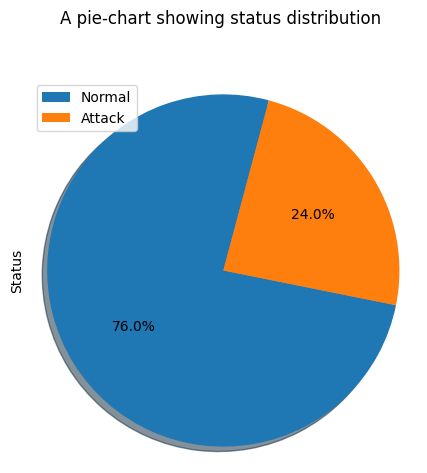

In [15]:
# Distribution of the target variable
labels = 'Normal','Attack'
dataframe['Status'].astype(str).value_counts().plot(kind='pie',
                            figsize=(5, 5),
                            autopct='%1.1f%%',
                            startangle=75,
                            shadow=True,
                            labels=None,
                            )

plt.title('A pie-chart showing status distribution ', y=1.12)
plt.axis('equal')
plt.legend(labels=labels, loc='upper left')
plt.show()

VMID  Status
1     Normal      18
2     Normal      18
3     Normal      18
4     Normal      19
5     Attack    1153
      Normal     366
6     Attack    1153
      Normal      60
7     Normal    1885
8     Normal    1640
9     Normal    1640
10    Normal    1640
Name: Status, dtype: int64


<Figure size 1200x400 with 0 Axes>

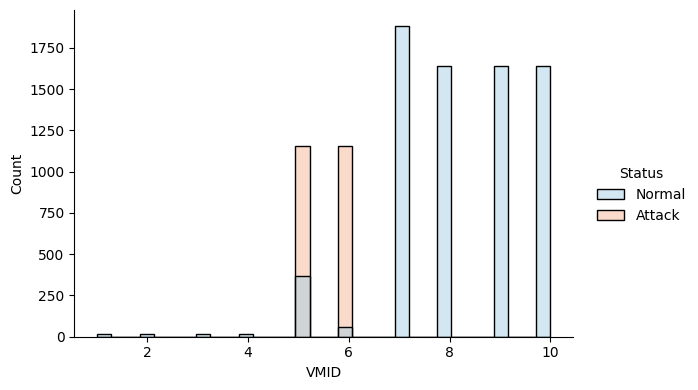

In [16]:
# distribution of the rate of the recieved packets from the network versus status
plt.figure(figsize=(12,4))
groupby_VMID = dataframe.groupby('VMID')['Status']
print(groupby_VMID.value_counts())
sns.displot(data = dataframe, x = 'VMID', hue = 'Status', height=4, aspect=1.5, palette= 'RdBu_r')

<Axes: xlabel='VMID', ylabel='count'>

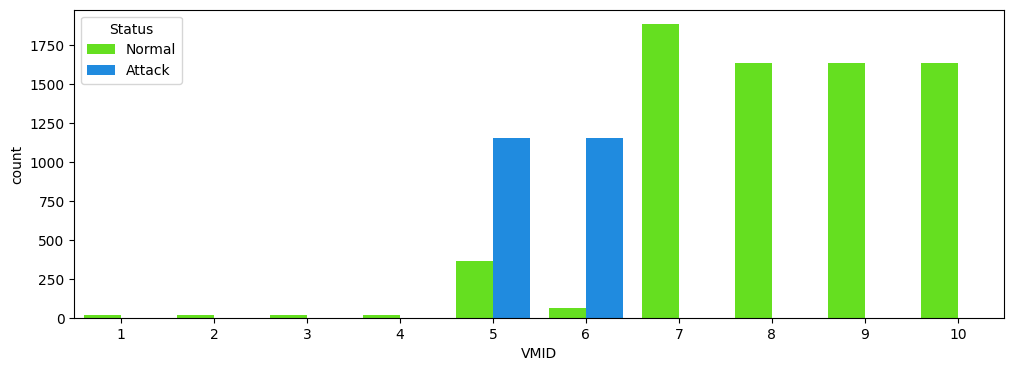

In [17]:
plt.figure(figsize=(12,4))
sns.countplot(x="VMID", hue = "Status",data=dataframe,palette='gist_rainbow')

In [18]:
dataframe.columns

Index(['VMID', 'UUID', 'rxbytes_slope', 'rxpackets_slope', 'txbytes_slope',
       'txpackets_slope', 'timecpu_slope', 'timesys_slope', 'timeusr_slope',
       'state_slope', 'cputime_slope', 'memminor_fault_slope',
       'memunused_slope', 'memusable_slope', 'memlast_update_slope',
       'memrss_slope', 'vdard_req_slope', 'vdard_bytes_slope',
       'vdawr_reqs_slope', 'hdard_req_slope', 'Status'],
      dtype='object')

<ipython-input-19-efa32edae1eb>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe_subset.corr(), linewidth=1, annot=True,fmt=".2f",cmap="RdYlGn", annot_kws={"size":6})


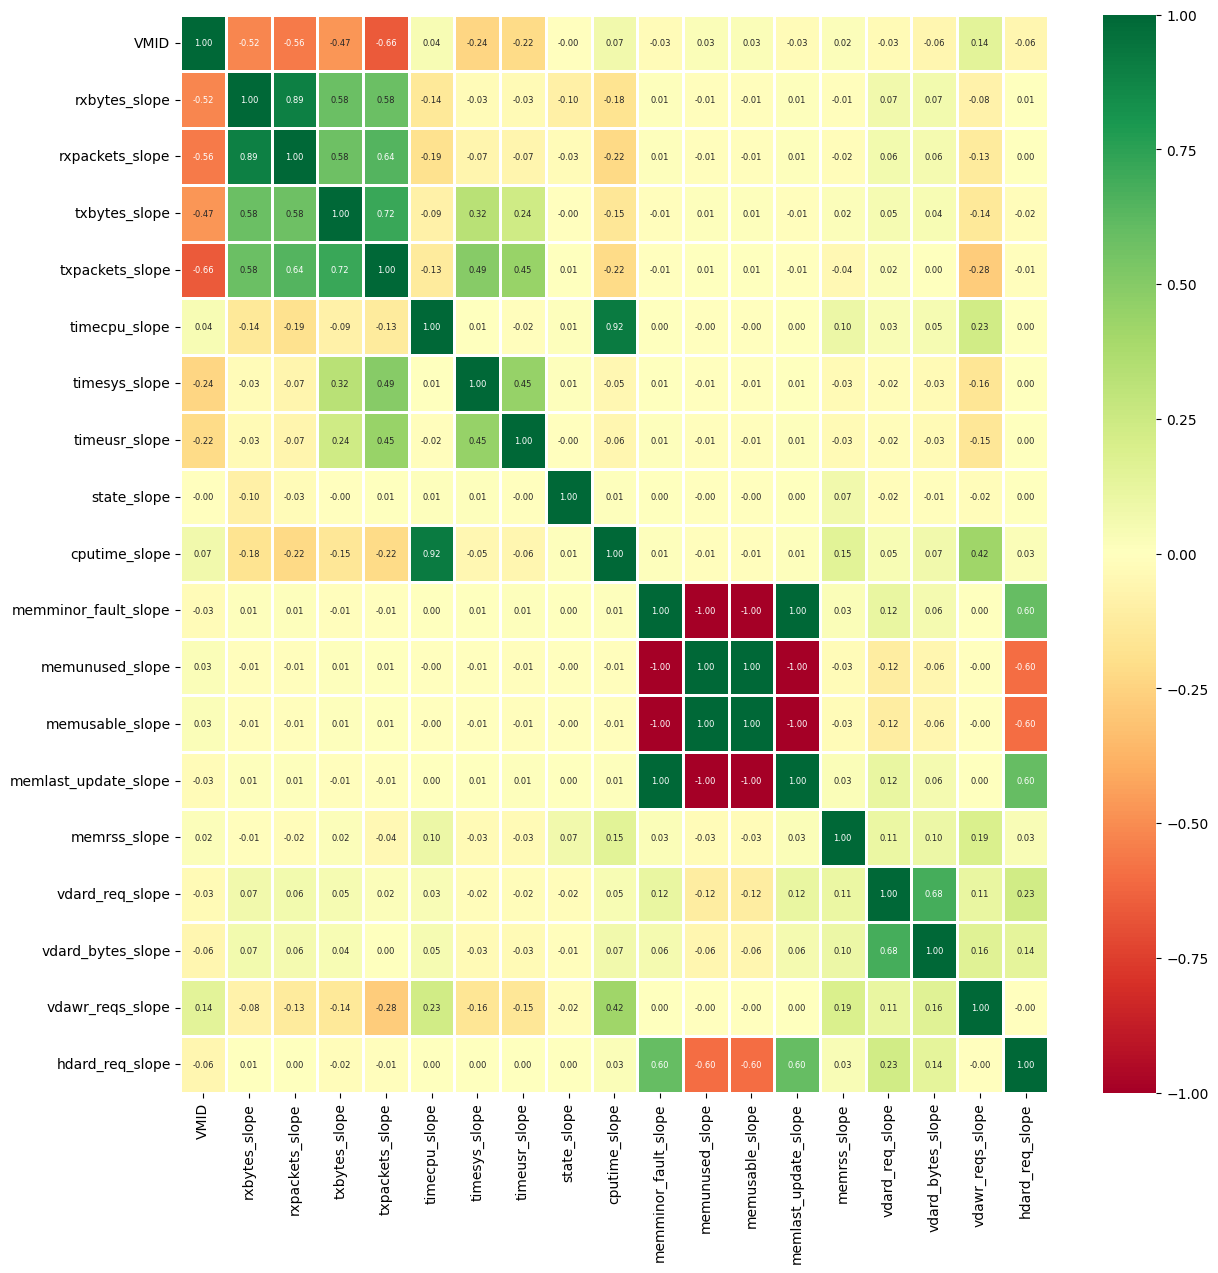

In [19]:
dataframe_subset = dataframe[['VMID', 'UUID', 'rxbytes_slope', 'rxpackets_slope', 'txbytes_slope',
       'txpackets_slope', 'timecpu_slope', 'timesys_slope', 'timeusr_slope',
       'state_slope', 'cputime_slope', 'memminor_fault_slope',
       'memunused_slope', 'memusable_slope', 'memlast_update_slope',
       'memrss_slope', 'vdard_req_slope', 'vdard_bytes_slope',
       'vdawr_reqs_slope', 'hdard_req_slope',]]
# heatmap to display the correlation of variables
plt.figure(figsize=(14, 14))
sns.heatmap(dataframe_subset.corr(), linewidth=1, annot=True,fmt=".2f",cmap="RdYlGn", annot_kws={"size":6})
plt.show()

<Figure size 400x400 with 0 Axes>

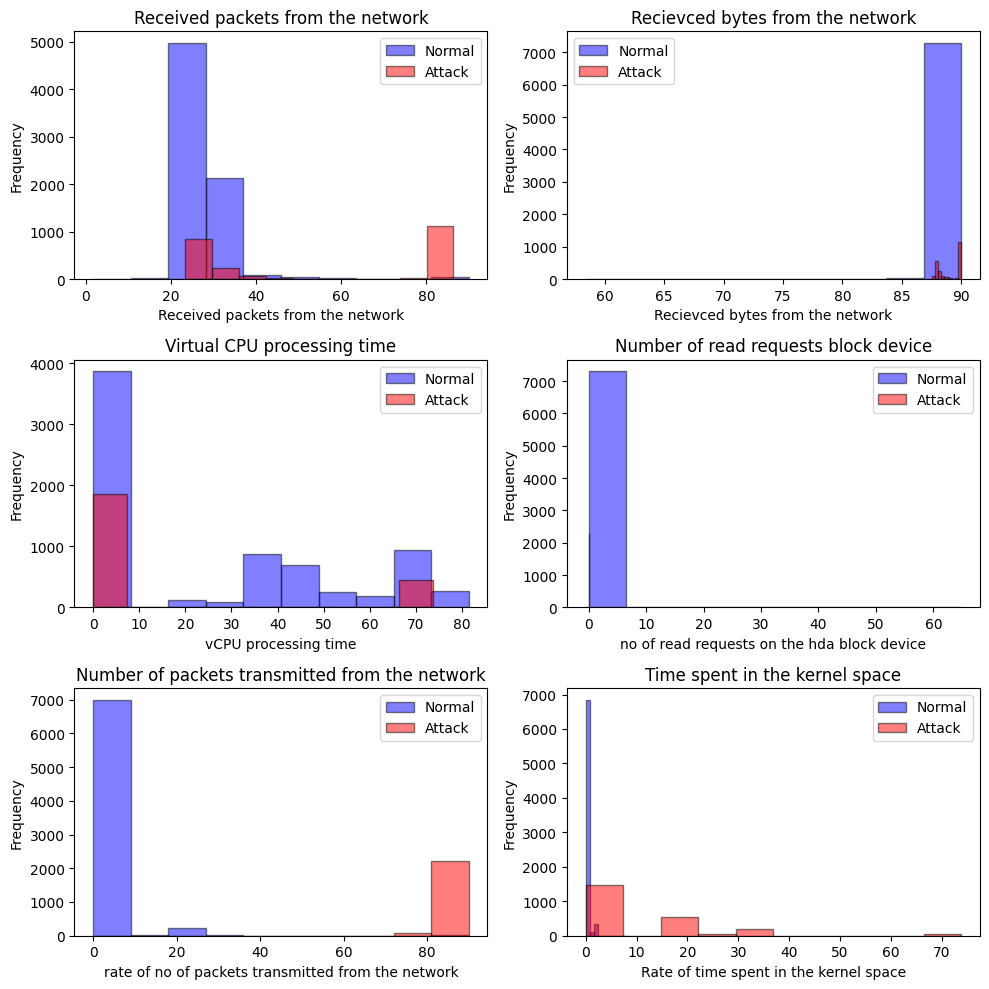

In [20]:
# Extract values from DataFrame
plt.figure(figsize=(4,4))

# Extract values for each histogram
Normal_values = dataframe[dataframe['Status'] == 'Normal']['rxpackets_slope']
Attack_values = dataframe[dataframe['Status'] == 'Attack']['rxpackets_slope']

Normal_values1 = dataframe[dataframe['Status'] == 'Normal']['rxbytes_slope']
Attack_values1 = dataframe[dataframe['Status'] == 'Attack']['rxbytes_slope']

Normal_values2 = dataframe[dataframe['Status'] == 'Normal']['timecpu_slope']
Attack_values2 = dataframe[dataframe['Status'] == 'Attack']['timecpu_slope']

Normal_values3 = dataframe[dataframe['Status'] == 'Normal']['hdard_req_slope']
Attack_values3 = dataframe[dataframe['Status'] == 'Attack']['hdard_req_slope']

Normal_values4 = dataframe[dataframe['Status'] == 'Normal']['txpackets_slope']
Attack_values4 = dataframe[dataframe['Status'] == 'Attack']['txpackets_slope']

Normal_values5 = dataframe[dataframe['Status'] == 'Normal']['timesys_slope']
Attack_values5 = dataframe[dataframe['Status'] == 'Attack']['timesys_slope']


# Create subplots for histograms
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))  # 1 row, 2 columns


# Construct histograms for the recievced packet
axes[0,0].hist(Normal_values, bins=10, color='blue', alpha=0.5, label='Normal', edgecolor='black')
axes[0,0].hist(Attack_values, bins=10, color='red', alpha=0.5, label='Attack', edgecolor='black')
axes[0,0].set_title('Received packets from the network')
axes[0,0].set_xlabel('Received packets from the network')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()

# Construct histogram for the recievced bytes from the network

axes[0,1].hist(Normal_values1, bins=10, color='blue', alpha=0.5, label='Normal', edgecolor='black')
axes[0,1].hist(Attack_values1, bins=10, color='red', alpha=0.5, label='Attack', edgecolor='black')
axes[0,1].set_title('Recievced bytes from the network')
axes[0,1].set_xlabel('Recievced bytes from the network')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()

# Construct histogram for vCPU processing time

axes[1,0].hist(Normal_values2, bins=10, color='blue', alpha=0.5, label='Normal', edgecolor='black')
axes[1,0].hist(Attack_values2, bins=10, color='red', alpha=0.5, label='Attack', edgecolor='black')
axes[1,0].set_title('Virtual CPU processing time')
axes[1,0].set_xlabel('vCPU processing time')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()

# Construct histogram for the number of read requests on block device

axes[1,1].hist(Normal_values3, bins=10, color='blue', alpha=0.5, label='Normal', edgecolor='black')
axes[1,1].hist(Attack_values3, bins=10, color='red', alpha=0.5, label='Attack', edgecolor='black')
axes[1,1].set_title('Number of read requests block device')
axes[1,1].set_xlabel('no of read requests on the hda block device')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()

# Construct histogram for the rate of the number of packets transmitted from the network

axes[2,0].hist(Normal_values4,bins=10, color='blue', alpha=0.5, label='Normal', edgecolor='black')
axes[2,0].hist(Attack_values4, bins=10, color='red', alpha=0.5, label='Attack', edgecolor='black')
axes[2,0].set_title('Number of packets transmitted from the network')
axes[2,0].set_xlabel('rate of no of packets transmitted from the network')
axes[2,0].set_ylabel('Frequency')
axes[2,0].legend()

# Construct histogram for the rate of time spent in the kernel space

axes[2,1].hist(Normal_values5,bins=10, color='blue', alpha=0.5, label='Normal', edgecolor='black')
axes[2,1].hist(Attack_values5, bins=10, color='red', alpha=0.5, label='Attack', edgecolor='black')
axes[2,1].set_title('Time spent in the kernel space')
axes[2,1].set_xlabel('Rate of time spent in the kernel space')
axes[2,1].set_ylabel('Frequency')
axes[2,1].legend()


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [21]:
# Perform label encoding for the target variable
label_encoder = LabelEncoder()
dataframe['Status_new'] = label_encoder.fit_transform(dataframe['Status'])

In [22]:
dataframe1= dataframe.drop(['Status'], axis =1)
dataframe1

,VMID,UUID,rxbytes_slope,rxpackets_slope,txbytes_slope,txpackets_slope,timecpu_slope,timesys_slope,timeusr_slope,state_slope,...,memminor_fault_slope,memunused_slope,memusable_slope,memlast_update_slope,memrss_slope,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,hdard_req_slope,Status_new
0,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",88.2065,30.1414,79.8981,5.5275,0.0000,0.0000,0.0739,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,24.3045,0.0,1
1,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",87.8708,27.3499,0.0000,0.0000,73.8278,0.0000,0.0593,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,5.9061,0.0,1
2,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",87.8865,27.2996,0.0000,0.0000,0.0000,0.0000,0.0554,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,32.8285,0.0,1
3,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",87.8760,27.4076,0.0000,0.0000,0.0000,0.0000,0.0637,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,4.2364,0.0,1
4,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",87.7241,25.8210,0.0000,0.0000,0.0000,0.0000,0.1109,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,22.7510,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9605,6,cf1325c0-957a-4744-8912-377f3f477971,88.7897,30.9638,90.0000,89.9974,0.0000,21.8014,8.0445,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0
9606,6,cf1325c0-957a-4744-8912-377f3f477971,88.0519,29.5388,90.0000,89.9977,0.0000,26.5651,8.4934,0.0,...,0.0,0.0,0.0,0.0,-81.6341,0.0,0.0,0.0000,0.0,0
9607,6,cf1325c0-957a-4744-8912-377f3f477971,89.1474,45.9392,90.0000,89.9950,0.0000,13.1340,4.1562,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0
9608,6,cf1325c0-957a-4744-8912-377f3f477971,87.7974,26.5651,0.0000,0.0000,0.0000,0.0000,0.0573,0.0,...,0.0,0.0,0.0,0.0,57.9946,0.0,0.0,20.1363,0.0,0


## **FEATURE SELECTION**

In [23]:
dataframe1.columns

Index(['VMID', 'UUID', 'rxbytes_slope', 'rxpackets_slope', 'txbytes_slope',
       'txpackets_slope', 'timecpu_slope', 'timesys_slope', 'timeusr_slope',
       'state_slope', 'cputime_slope', 'memminor_fault_slope',
       'memunused_slope', 'memusable_slope', 'memlast_update_slope',
       'memrss_slope', 'vdard_req_slope', 'vdard_bytes_slope',
       'vdawr_reqs_slope', 'hdard_req_slope', 'Status_new'],
      dtype='object')

In [24]:
# splitting the dataset into X and y dataset
Xa = dataframe1.drop(columns = ['VMID', 'UUID','Status_new'])
y = dataframe1['Status_new']

In [25]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the DataFrame
Xn = scaler.fit_transform(Xa)


# Convert the scaled data back to a DataFrame
X = pd.DataFrame(Xn, columns=Xa.columns)

In [26]:
model = RandomForestClassifier()
model.fit(X, y)

feature_importance = model.feature_importances_

#Create a DataFrame to display feature importance
feature_importance_dataframe = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort feature importance in descending order
feature_importance_dataframe = feature_importance_dataframe.sort_values(by='Importance', ascending=False)

feature_importance_dataframe


,Feature,Importance
3,txpackets_slope,0.375259
2,txbytes_slope,0.259893
0,rxbytes_slope,0.132199
5,timesys_slope,0.071182
6,timeusr_slope,0.060412
1,rxpackets_slope,0.056566
16,vdawr_reqs_slope,0.035145
4,timecpu_slope,0.003223
8,cputime_slope,0.002517
13,memrss_slope,0.002426


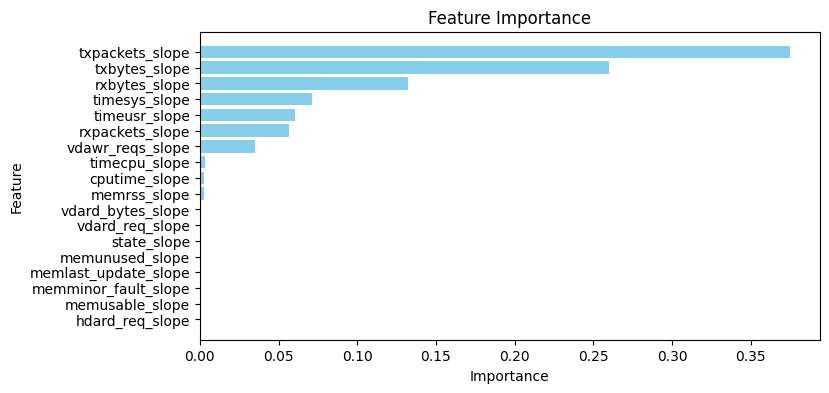

In [27]:
# Create a bar graph
plt.figure(figsize=(8, 4))
plt.barh(feature_importance_dataframe['Feature'], feature_importance_dataframe['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display highest importance at the top
plt.show()

In [28]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **FEEDFOWARD NEURAL NETWORK (FFNN) IMPLEMENTATION**

In [29]:
fnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(18,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

In [30]:
# Compile the model
fnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
# Train the model
fnn_history = fnn_model.fit(X_train, y_train,validation_data=(X_test, y_test), verbose=1, epochs=50, batch_size=32)

Epoch 1/50
241/241 [==============================] - 4s 8ms/step - loss: 0.1152 - accuracy: 0.9646 - val_loss: 0.0160 - val_accuracy: 0.9958
Epoch 2/50
241/241 [==============================] - 2s 8ms/step - loss: 0.0117 - accuracy: 0.9973 - val_loss: 0.0137 - val_accuracy: 0.9953
Epoch 3/50
241/241 [==============================] - 2s 10ms/step - loss: 0.0115 - accuracy: 0.9973 - val_loss: 0.0133 - val_accuracy: 0.9964
Epoch 4/50
241/241 [==============================] - 3s 11ms/step - loss: 0.0118 - accuracy: 0.9970 - val_loss: 0.0142 - val_accuracy: 0.9958
Epoch 5/50
241/241 [==============================] - 2s 7ms/step - loss: 0.0097 - accuracy: 0.9974 - val_loss: 0.0129 - val_accuracy: 0.9969
Epoch 6/50
241/241 [==============================] - 2s 6ms/step - loss: 0.0102 - accuracy: 0.9971 - val_loss: 0.0121 - val_accuracy: 0.9969
Epoch 7/50
241/241 [==============================] - 2s 7ms/step - loss: 0.0110 - accuracy: 0.9973 - val_loss: 0.0155 - val_accuracy: 0.9964
Epoc

### **Model Evaluation**

In [32]:
# model evaluation for using the test dataset for the feedfoward neural network
fnn_loss, fnn_accuracy = fnn_model.evaluate(X_test, y_test, verbose=0)
print ("Loss=%.4f" %fnn_loss)
print ("Accuracy=%.4f" %fnn_accuracy)

Loss=0.0156
Accuracy=0.9969


In [33]:
# predicting the test results
y_predfnn= fnn_model.predict(X_test)
y_predfnn = np.round(y_predfnn)


61/61 [==============================] - 0s 1ms/step


In [34]:
fnn_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

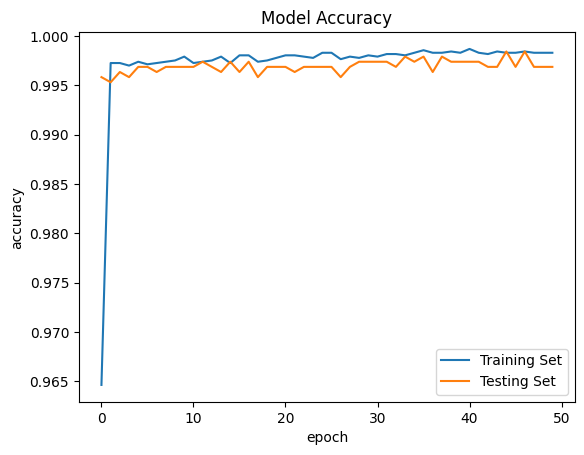

In [35]:
plt.plot(fnn_history.history['accuracy'])
plt.plot(fnn_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Set','Testing Set'], loc = 'lower right')

In [36]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_predfnn)

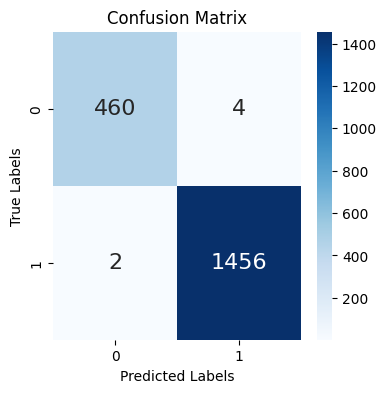

In [37]:
# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [38]:
# Generate classification report
report = classification_report(y_test, y_predfnn)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       464
           1       1.00      1.00      1.00      1458

    accuracy                           1.00      1922
   macro avg       1.00      1.00      1.00      1922
weighted avg       1.00      1.00      1.00      1922



In [39]:
# train the blackbox (feed Foward Neural Network)
model_fnn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=50, random_state=42)
model_fnn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=50, random_state=42)

In [46]:
X_test = pd.DataFrame(X_test)
X_train.columns = pd.Index(X_train.columns)

feature_names = list(X_train.columns)

In [82]:
X_test

,rxbytes_slope,rxpackets_slope,txbytes_slope,txpackets_slope,timecpu_slope,timesys_slope,timeusr_slope,state_slope,cputime_slope,memminor_fault_slope,memunused_slope,memusable_slope,memlast_update_slope,memrss_slope,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,hdard_req_slope
4030,0.935290,0.298240,0.000000,0.000000,0.000000,0.000000,0.004016,0.577361,0.0,0.0,1.0,1.0,0.0,0.581958,0.0,0.0,0.331584,0.0
2012,0.930317,0.281134,0.000000,0.000000,0.000000,0.000000,0.004305,0.577361,0.0,0.0,1.0,1.0,0.0,0.498801,0.0,0.0,0.200024,0.0
367,0.935290,0.298240,0.605137,0.021214,0.000000,0.000000,0.001004,0.577361,0.0,0.0,1.0,1.0,0.0,0.498801,0.0,0.0,0.226038,0.0
9603,0.933873,0.298240,1.000000,0.999991,0.000000,0.295301,0.409038,0.577361,0.0,0.0,1.0,1.0,0.0,0.498801,0.0,0.0,0.000000,0.0
4141,0.927998,0.272691,0.000000,0.000000,0.000000,0.000000,0.001945,0.577361,0.0,0.0,1.0,1.0,0.0,0.498801,0.0,0.0,0.181730,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7638,0.999092,0.947784,0.999701,0.955880,0.000000,0.000000,0.003012,0.577361,0.0,0.0,1.0,1.0,0.0,0.498801,0.0,0.0,0.042815,0.0
1438,0.930317,0.281134,0.000000,0.000000,0.552356,0.002846,0.006023,0.577361,1.0,0.0,1.0,1.0,0.0,0.498801,0.0,0.0,0.897290,0.0
5304,0.927998,0.272691,0.000000,0.000000,0.540828,0.002003,0.003884,0.577361,1.0,0.0,1.0,1.0,0.0,0.243116,0.0,0.0,0.827292,0.0
229,0.941548,0.314878,0.857730,0.042380,0.000000,0.000000,0.003012,0.577361,0.0,0.0,1.0,1.0,0.0,0.415643,0.0,0.0,0.226038,0.0


In [83]:
y_test

4030    1
2012    1
367     1
9603    0
4141    1
       ..
7638    0
1438    1
5304    1
229     1
8970    0
Name: Status_new, Length: 1922, dtype: int64

In [59]:
#converts this the training dataframe into a 2D- array
X_train_np = X_train.to_numpy()

In [71]:
# instantiating the expaliner
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_np, feature_names=feature_names,verbose=True, mode='classification')

In [72]:
# converts this the testing dataframe into a 2-D array
X_test_np = X_test.to_numpy()

In [99]:
# Generate explanations
explanation = explainer.explain_instance(X_test_np[45], model.predict_proba, num_features=9)

Intercept 0.9346726404480432
Prediction_local [-0.0202555]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [100]:
# Visualize the explanations
explanation.show_in_notebook()

### **CONVOLUTIONAL NEURAL NETWORK (FFNN) IMPLEMENTATION**

In [ ]:
# Reshape the features for CNN input
X_train = X_train.values.reshape(-1, X_train.shape[1], 1)
X_test = X_test.values.reshape(-1, X_test.shape[1], 1)

In [ ]:
# Build the CNN model
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(100, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
cnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
cnn_history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

In [ ]:
# model evaluation
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print ("Loss=%.4f" %cnn_loss)
print ("Accuracy=%.4f" %cnn_accuracy)

In [ ]:
y_predcnn= cnn_model.predict(X_test)
y_predcnn=(y_predcnn>= 0.5)

In [ ]:
cm_cnn = confusion_matrix(y_test, y_predcnn)
cm_cnn

In [ ]:
y_predcnn= cnn_model.predict(X_test)
y_predcnn = np.round(y_predcnn)

In [ ]:
# Calculate confusion matrix
cm_cnn = confusion_matrix(y_test, y_predcnn)

In [ ]:
# Plot confusion matrix performance of the convolutional neural network
plt.figure(figsize=(4, 4))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Generate classification report
report_cnn = classification_report(y_test, y_predfnn)

# Print the classification report
print("Classification Report:")
print(report_cnn)

In [ ]:
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Set','Testing Set'], loc = 'lower right')

### **RECURRENT NEURAL NETWORK (RNN) IMPLEMENTATION**

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the features for RNN input
X_train_rnn = np.expand_dims(X_train.values, axis=2)
X_test_rnn = np.expand_dims(X_test.values, axis=2)

In [ ]:
# Build the RNN model
rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(100, activation='relu', input_shape= (X_train_rnn.shape[1], X_train_rnn.shape[2])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_rnn, y_test), verbose=1)

In [ ]:
# model evaluation
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test, y_test, verbose=0)
print ("Loss=%.4f" %rnn_loss)
print ("Accuracy=%.4f" %rnn_accuracy)

In [ ]:
y_predrnn= rnn_model.predict(X_test)
y_predrnn = np.round(y_predrnn)

In [ ]:
# Calculate confusion matrix
cm_rnn = confusion_matrix(y_test, y_predrnn)
cm_rnn

In [ ]:
# Plot confusion matrix for performance of recurrent neural network
plt.figure(figsize=(4, 4))
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Generate classification report
report_rnn = classification_report(y_test, y_predrnn)

# Print the classification report
print("Classification Report:")
print(report_rnn )

In [ ]:
plt.plot(rnn_history.history['accuracy'])
plt.plot(rnn_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Set','Testing Set'], loc = 'lower right')